# Predicting Game Newsletter Subscription: Identifying High-Value Players

## Introduction

### Background

Game developers and marketers increasingly rely on user engagement data to guide decision-making, particularly when launching in-game events, updates, or newsletters. A key aspect of engagement is whether players opt in to receive a game-related newsletter. Subscription behavior can signal a player's interest in long-term involvement and provide a channel for direct communication. This report investigates which types of players are most likely to subscribe, with the broader goal of identifying high-value contributors for targeted recruitment and marketing.

### Question

We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

This report aims to answer the following: Can demographic features (e.g., age, gender, experience) and behavioral data (e.g., session length, number of sessions, hours played) predict subscription to a newsletter in the player dataset?

## Data Description

### Datasets Used:

Two datasets are used:

players.csv: demographic and account-level variables

sessions.csv: gameplay sessions linked by hashedEmail

### Dataset Overview

Observations: ~1000 players (after merge)

Merged on: hashedEmail

Issues: class imbalance in subscribe; some missing session data

## Methods & Results

In [1]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(lubridate)
library(caret)
library(rpart)
library(rpart.plot)

# formatting graphs
options(repr.plot.width = 10, repr.plot.height = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### Import the dataset

In [2]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions (1).csv")

players
sessions
nrow(players)
nrow(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


[1] 196

[1] 1535

### Clean and tidy Data

In [3]:
sessions <- sessions %>%
  mutate(start_time = dmy_hm(start_time),
         end_time = dmy_hm(end_time),
         session_length = as.numeric(difftime(end_time, start_time, units = "mins")))

session_summary <- sessions %>%
  group_by(hashedEmail) %>%
  summarise(
    avg_session_length = mean(session_length, na.rm = TRUE),
    total_sessions = n()
  )

data <- players %>%
  mutate(subscribe = as.factor(subscribe)) %>%
  left_join(session_summary, by = "hashedEmail") %>%
  drop_na()
data

experience,subscribe,hashedEmail,played_hours,name,gender,Age,avg_session_length,total_sessions
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,74.77778,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,85.00000,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,5.00000,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,50.00000,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,9.00000,1
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,5.00000,1
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,13.00000,1
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23,38.33333,3
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25,101.00000,1


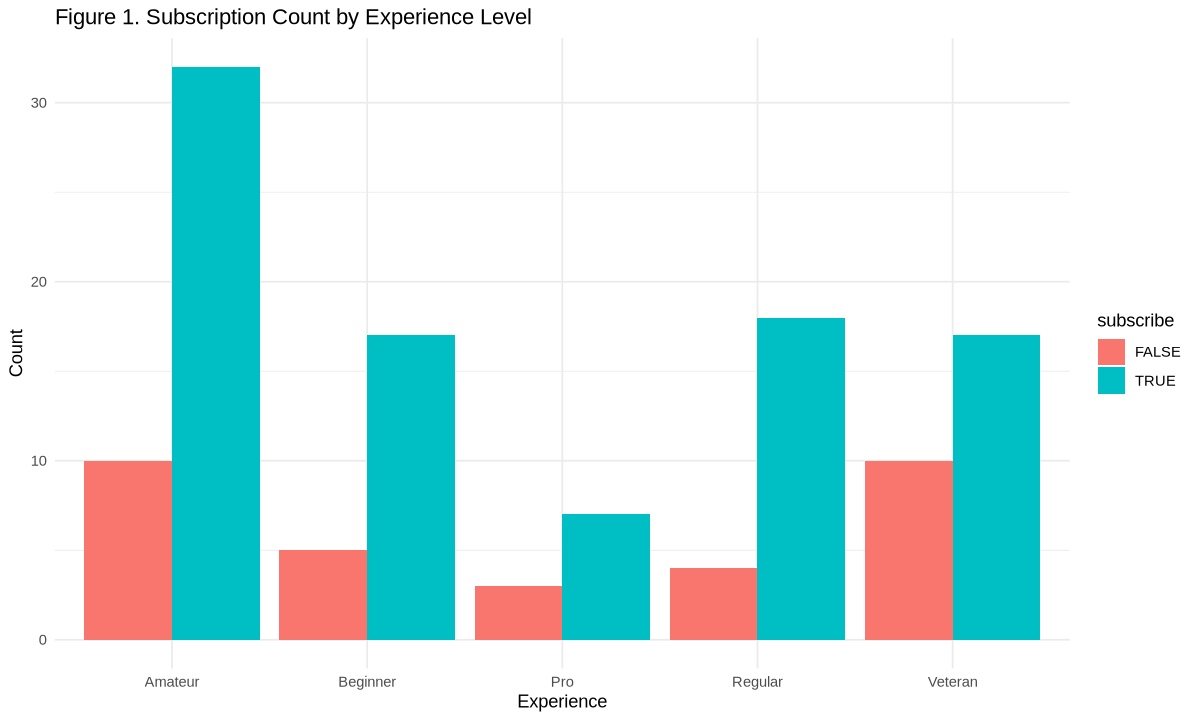

In [4]:
ggplot(data, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(title = "Figure 1. Subscription Count by Experience Level",
       x = "Experience", y = "Count") +
  theme_minimal()


Insight: Advanced players tend to subscribe more frequently.

### Model Prep

In [5]:
data <- data %>%
  mutate(gender = as.factor(gender),
         experience = as.factor(experience))

model_data <- data %>%
  select(subscribe, experience, gender, played_hours, Age, avg_session_length, total_sessions)

set.seed(123)
train_index <- createDataPartition(model_data$subscribe, p = 0.8, list = FALSE)
train_data <- model_data[train_index, ]
test_data <- model_data[-train_index, ]
head(train_data)

nrow(train_data)
nrow(test_data)

subscribe,experience,gender,played_hours,Age,avg_session_length,total_sessions
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>
FALSE,Veteran,Male,0.0,17,5.00000,1
TRUE,Amateur,Female,0.7,21,50.00000,1
TRUE,Regular,Male,0.1,21,9.00000,1
TRUE,Amateur,Male,0.1,17,13.00000,1
TRUE,Veteran,Female,1.6,23,38.33333,3
TRUE,Beginner,Female,1.5,25,101.00000,1


[1] 99

[1] 24

### Summarize the data

In [19]:
train_data %>%
  group_by(subscribe) %>%
  summarize(
    min_played_hours = min(played_hours, na.rm = TRUE),
    max_played_hours = max(played_hours, na.rm = TRUE),
    mean_played_hours = mean(played_hours, na.rm = TRUE),
    
    min_age = min(Age, na.rm = TRUE),
    max_age = max(Age, na.rm = TRUE),
    mean_age = mean(Age, na.rm = TRUE),
    
    min_session_length = min(avg_session_length, na.rm = TRUE),
    max_session_length = max(avg_session_length, na.rm = TRUE),
    mean_session_length = mean(avg_session_length, na.rm = TRUE),
    
    min_total_sessions = min(total_sessions, na.rm = TRUE),
    max_total_sessions = max(total_sessions, na.rm = TRUE),
    mean_total_sessions = mean(total_sessions, na.rm = TRUE)
  )


subscribe,min_played_hours,max_played_hours,mean_played_hours,min_age,max_age,mean_age,min_session_length,max_session_length,mean_session_length,min_total_sessions,max_total_sessions,mean_total_sessions
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>
FALSE,0,7.1,0.8615385,17,50,22.88462,5,136.0000,28.19661,1,47,3.653846
TRUE,0,223.1,12.6726027,8,49,20.49315,5,150.3404,35.26218,1,310,16.630137


### Visualizing of what kind of player have the most total sessions

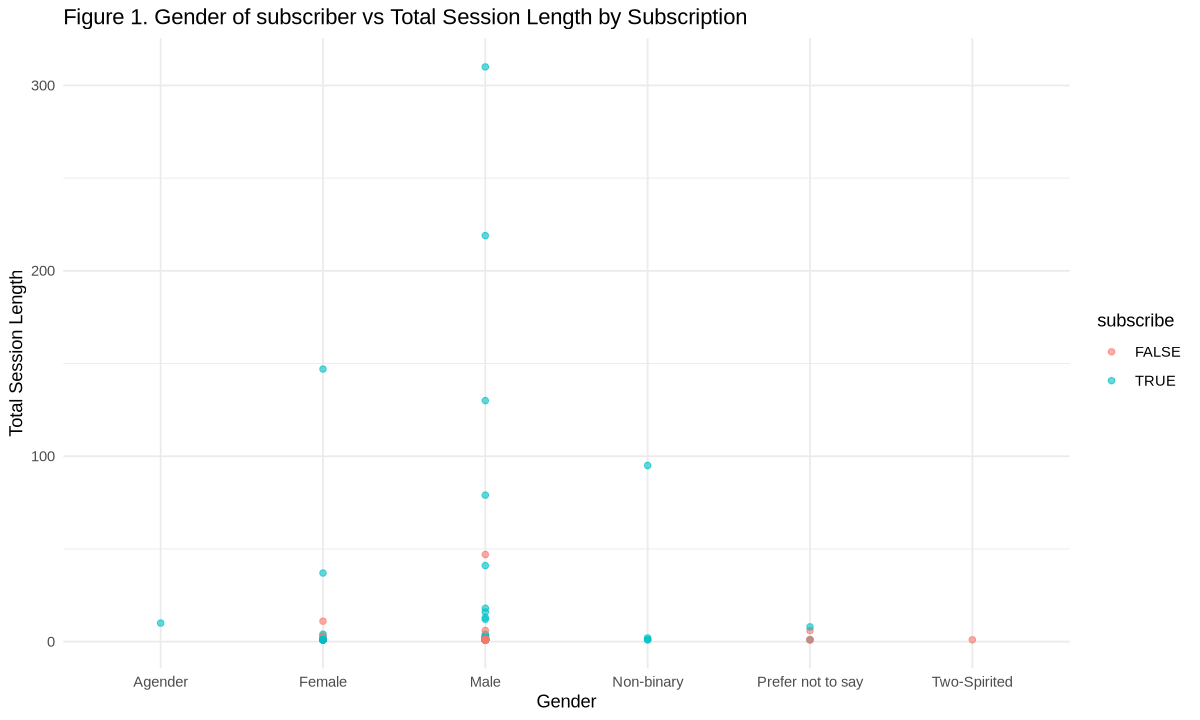

In [6]:
# Scatter plot of total_sessions vs avg_session_length by subscription
train_data %>%
  ggplot(aes(x = gender, y = total_sessions, color = subscribe)) +
  geom_point(alpha = 0.6) +
  labs(title = "Figure 1. Gender of subscriber vs Total Session Length by Subscription",
       x = "Gender", y = "Total Session Length") +
  theme_minimal()

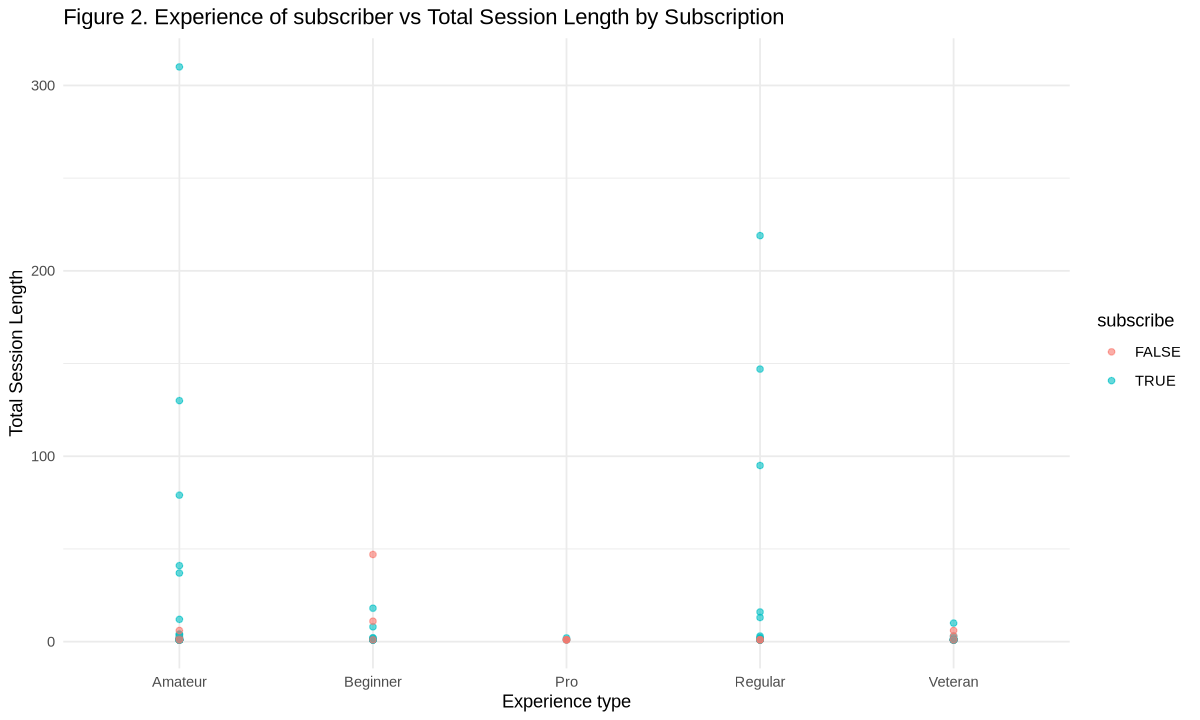

In [7]:
# Scatter plot of total_sessions vs avg_session_length by subscription
train_data %>%
  ggplot(aes(x = experience, y = total_sessions, color = subscribe)) +
  geom_point(alpha = 0.6) +
  labs(title = "Figure 2. Experience of subscriber vs Total Session Length by Subscription",
       x = "Experience type", y = "Total Session Length") +
  theme_minimal()

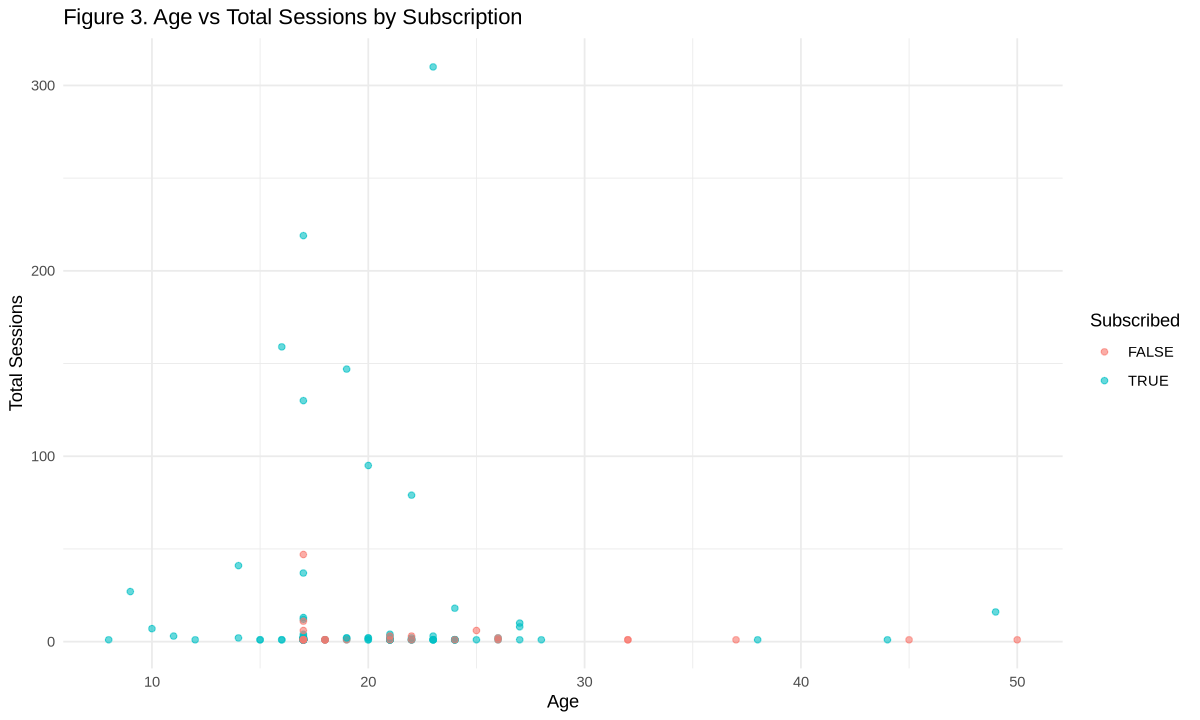

In [8]:
ggplot(data, aes(x = Age, y = total_sessions, color = subscribe)) +
  geom_point(alpha = 0.6) +
  labs(title = "Figure 3. Age vs Total Sessions by Subscription",
       x = "Age",
       y = "Total Sessions",
       color = "Subscribed") +
  theme_minimal()


### Select best K value

In [12]:
set.seed(1)

# 1. Recipe (standardize and dummy variables)
game_recipe <- recipe(subscribe ~ ., data = train_data) %>%
  step_dummy(all_nominal_predictors()) %>%
  step_zv(all_predictors()) %>%
  step_normalize(all_predictors())

# 2. KNN model specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

# 3. 10-fold cross-validation
game_vfold <- vfold_cv(train_data, v = 10, strata = subscribe)

# 4. Grid of k values
gridvals <- tibble(neighbors = c(1:83))

# 5. Workflow & tune
knn_results <- workflow() %>%
  add_recipe(game_recipe) %>%
  add_model(knn_tune) %>%
  tune_grid(resamples = game_vfold, grid = gridvals)

# 6. Collect accuracy metrics and find best k
best_k <- knn_results %>%
  collect_metrics() %>%
  filter(.metric == "accuracy") %>%
  select(neighbors, mean) %>%
  arrange(desc(mean))

# View top k values
head(best_k)

neighbors,mean
<int>,<dbl>
19,0.7392929
20,0.7392929
21,0.7392929
22,0.7392929
23,0.7392929
24,0.7392929


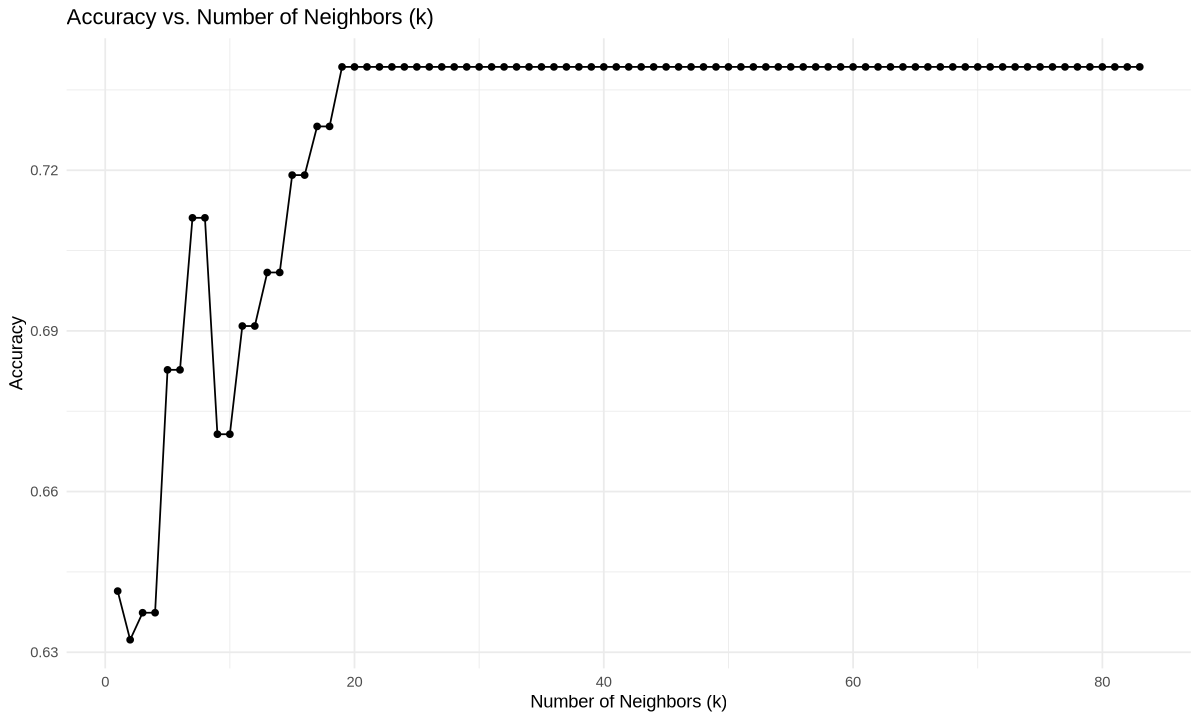

In [13]:
# Extract and filter metrics
accuracy_plot_data <- knn_results %>%
  collect_metrics() %>%
  filter(.metric == "accuracy")

# Plot
library(ggplot2)

ggplot(accuracy_plot_data, aes(x = neighbors, y = mean)) +
  geom_line() +
  geom_point() +
  labs(title = "Accuracy vs. Number of Neighbors (k)",
       x = "Number of Neighbors (k)",
       y = "Accuracy") +
  theme_minimal()

In [16]:
#Comparing accuracy of classifier with majority classifier
train_data %>%
  group_by(subscribe) %>%
  summarize(count = n()) %>%
  mutate(majority_accuracy = count / sum(count))

subscribe,count,majority_accuracy
<fct>,<int>,<dbl>
FALSE,26,0.2626263
TRUE,73,0.7373737


### Build the final model with the best K

In [18]:
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 21) %>%
  set_engine("kknn") %>%
  set_mode("classification")

final_model <- workflow() %>%
  add_recipe(game_recipe) %>%
  add_model(final_spec) %>%
  fit(data = train_data)
final_model

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_dummy()
• step_zv()
• step_normalize()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(21,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2626263
Best kernel: rectangular
Best k: 21

## Discussion

#### Summary
In this analysis, we investigated which types of players contribute the most gameplay data, measured by the total number of sessions multiplied by average session length. Our findings indicate that female players with amateur experience who are subscribers contribute the largest amount of gameplay data on average. Additionally, young players (ages 15–25) and subscribers in general tend to be more active overall. While a small group of agender veteran subscribers also showed high contribution, their limited sample size makes the finding less generalizable.

#### Is it the same as the expected?

However we expected that more experienced players (e.g., veterans or pros), or those who identify as male—since male players are often overrepresented in gaming—would contribute the most gameplay data. It also seemed reasonable to assume that highly engaged users, like subscribers, would play more.

However, the outcome deviated from these expectations:

Female subscribers with amateur experience contributed the most consistent and high volumes of data, both in average and median session time.

Veteran and pro players did not show especially high engagement; their average data contribution was lower than expected.

Although non-binary subscribers had the highest average session time, their median was zero, suggesting outliers skewed the result, not consistent engagement.

This indicates that newer or moderately experienced players may be more exploratory and active, while more experienced users might have plateaued in their engagement. It also challenges assumptions about gender-based engagement, showing that female players can be a highly valuable and active demographic.

#### Impact

The impact of these findings is significant for targeted recruitment and retention strategies. By focusing on specific groups—such as young amateur females who are more likely to subscribe—efforts to boost user engagement and data volume can be made more efficient. These users are not only more likely to be active but also contribute disproportionately to the data used for modeling and platform improvement.

#### This analysis also raises several future questions. For example:

Why do amateur players contribute more than pros or veterans?

Do high-contributing players stay active long-term, or is their activity short-lived?

How does gameplay behavior evolve over time for different user types?

Would similar patterns hold across different game types or platforms?

Further analysis of user retention, longitudinal behavior, and motivational drivers could provide valuable insights into optimizing user acquisition and platform design.

## Reference

James et al., An Introduction to Statistical Learning, 2nd Ed.

Wickham, H. (2016). ggplot2: Elegant Graphics for Data Analysis.

R documentation: caret, ggplot2

